# Objective:

Objective of this project is to assess the financial literacy of the population in West Bengal. 
Financial Literacy refers to the knowledge of banking facilities and various concepts related to banking that helps individual to make informed and effective decisions regarding their personal finances.
From World Bank Data we have studied the various trends in financial awareness in different socio-economic segments of population in India and did a parallel study specific to West Bengal to draw comparison with the World Bank Data. 


# Methodology:

We have done primary data collection through Google Form and physical survey. The Sampling Method used here is convenience sampling. 
The sample size of our data is 159 and there are 20 features. 
We have done hypothesis tests to understand how the association between different features in our data set. The two kinds of hypothesis tests that were applicable in our data were Chi Square Test of Association and Z test for proportion

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import association_metrics as am
from dython.nominal import associations
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

In [4]:
df=pd.read_csv("Bank_literacy.csv")

In [5]:
df

,Timestamp,Gender,AGE,District,Locality,Educational Qualification,Job_Type,Monthly Income,Have_Bank_Account,No. of Bank Account,Bank (Preferrable),Type of Bank Account,Use_ATM_Card,Use_Credit_Card,Use_NET_Banking,Use_Banking_App,Money Transfer Method,Investment Type,Satisfactied_with_Bank,Score
0,45073.35798,Woman,52,Hooghly,Village,Post Graduation,\nGovernment service,above Rs 50000,Yes,3,Public bank,"Savings Account, Salary Account",Yes,Not,Not,Not,NEFT,Pf,Yes,1.125000
1,45073.36023,Man,63,Hooghly,Village,Diploma,Business,Rs 20000 to Rs 30000,Yes,5,Public bank,Savings Account,Yes,Not,Not,Not,UPI,Mutual Fund,Not,1.265625
2,45073.40039,Woman,51,North 24 Parganas,Suburbs,Higher Secondary,Housewife,Rs5000 to Rs10000,Yes,1,Private bank,Savings Account,Not,Not,Not,Not,none,Fixed Deposit,Yes,0.188802
3,45073.41805,Woman,27,Hooghly,Village,Graduation,Private job,Rs 30000 to Rs 40000,Yes,4,Private bank,Savings Account,Yes,Yes,Yes,Yes,"RTGS, NEFT, DEMAND DRAFT, UPI","Fixed Deposit, Recurrent Deposit",Yes,17.125868
4,45073.42308,Man,28,Hooghly,Village,Higher Secondary,\nGovernment service,Rs5000 to Rs10000,Yes,2,Public bank,Savings Account,Yes,Not,Not,Not,UPI,Fixed Deposit,Yes,3.265734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,NaN,Man,63,North 24 Parganas,Suburbs,Secondary,Business,Rs5000 to Rs10000,Yes,2,Public bank,Savings Account,Not,Not,Not,Not,"RTGS,NEFT",Fixed Deposit,Yes,0.213598
155,NaN,Man,70,North 24 Parganas,Suburbs,Higher Secondary,Self -reliant,Rs 10000 to Rs 20000,Yes,1,Public bank,Savings Account,Not,Not,Not,Not,NaN,NaN,Yes,0.101133
156,NaN,Man,33,North 24 Parganas,Suburbs,Higher Secondary,Business,Rs5000 to Rs10000,Yes,2,Public bank,Savings Account,Yes,Not,Yes,Yes,UPI,Fixed Deposit,Yes,9.033711
157,NaN,Man,50,North 24 Parganas,Suburbs,No,Self -reliant,Rs5000 to Rs10000,Yes,1,Public bank,Savings Account,Yes,Not,Yes,Not,NaN,NaN,Yes,10.508428


# Hypothesis testing

# Chi Square test for association

In [6]:
contingency_table = pd.crosstab(df['Monthly Income'],df['Use_ATM_Card'])

In [7]:
contingency_table

Use_ATM_Card,Not,Yes
Monthly Income,,
Rs 10000 to Rs 20000,6,22
Rs 20000 to Rs 30000,2,13
Rs 30000 to Rs 40000,1,8
Rs 40000 to Rs 50000,0,4
Rs5000 to Rs10000,7,20
above Rs 50000,1,6
below Rs. 5000,36,29


In [8]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [9]:
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 24.162967826489837
p-value: 0.000487408074399108
Degrees of freedom: 6
Expected frequencies:
 [[ 9.57419355 18.42580645]
 [ 5.12903226  9.87096774]
 [ 3.07741935  5.92258065]
 [ 1.36774194  2.63225806]
 [ 9.23225806 17.76774194]
 [ 2.39354839  4.60645161]
 [22.22580645 42.77419355]]


Our p value is significant and there is a association between monthly income and use of atm card

In [10]:
contingency_table = pd.crosstab(df['Locality'],df['Use_Credit_Card'])

In [11]:
contingency_table

Use_Credit_Card,Not,Yes
Locality,,
City,37,7
Suburbs,59,12
Village,33,6


In [12]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [13]:
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 0.047363921153636294
p-value: 0.9765962564823344
Degrees of freedom: 2
Expected frequencies:
 [[36.85714286  7.14285714]
 [59.47402597 11.52597403]
 [32.66883117  6.33116883]]


P value is insignificant and there is no association between Locality and Use of Credit Card

In [14]:
contingency_table = pd.crosstab(df['Locality'],df['Use_NET_Banking'])

In [15]:
contingency_table

Use_NET_Banking,Not,Yes
Locality,,
City,22,22
Suburbs,42,29
Village,22,17


In [16]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [17]:
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 0.9301181885236149
p-value: 0.628097987106028
Degrees of freedom: 2
Expected frequencies:
 [[24.57142857 19.42857143]
 [39.64935065 31.35064935]
 [21.77922078 17.22077922]]


P value is insignificant and there is no association between locality and use of net banking

In [18]:
Edu=df['Educational Qualification']
NB=df['Use_NET_Banking']

In [19]:
mycrosstable=pd.crosstab(Edu,NB)
mycrosstable

Use_NET_Banking,Not,Yes
Educational Qualification,,
Diploma,1,4
Diploma,1,0
Eighth grade,3,1
Graduation,23,35
Higher Secondary,17,8
No,3,0
No,3,1
PhD,0,1
Post Graduation,11,15


In [20]:
chiVal,p_val,df_n,exp=chi2_contingency(mycrosstable)
print('chi_square value:',chiVal)
print('p value:',p_val)
print('Degree of Freedom:',df_n)
print(exp)

chi_square value: 30.70371088349596
p value: 0.0012273646361112027
Degree of Freedom: 11
[[ 2.79220779  2.20779221]
 [ 0.55844156  0.44155844]
 [ 2.23376623  1.76623377]
 [32.38961039 25.61038961]
 [13.96103896 11.03896104]
 [ 1.67532468  1.32467532]
 [ 2.23376623  1.76623377]
 [ 0.55844156  0.44155844]
 [14.51948052 11.48051948]
 [ 0.55844156  0.44155844]
 [ 5.58441558  4.41558442]
 [ 8.93506494  7.06493506]]


P value is significant here there is a association between educational qualifications and use net banking

In [21]:
JB=df['Job_Type']
CC=df['Use_Credit_Card']

In [22]:
mycrosstable=pd.crosstab(JB,CC)
mycrosstable

Use_Credit_Card,Not,Yes
Job_Type,,
\nGovernment service,12,2
Business,11,2
Housewife,10,1
Maid,1,0
Other,1,0
Private job,31,9
Self -reliant,23,4
Student,38,7
Unemployed,1,0


In [23]:
chiVal,p_val,df_n,exp=chi2_contingency(mycrosstable)
print('chi_square value:',chiVal)
print('p value:',p_val)
print('Degree of Freedom:',df_n)
print(exp)

chi_square value: 2.444076150091654
p value: 0.982349814513801
Degree of Freedom: 9
[[11.72727273  2.27272727]
 [10.88961039  2.11038961]
 [ 9.21428571  1.78571429]
 [ 0.83766234  0.16233766]
 [ 0.83766234  0.16233766]
 [33.50649351  6.49350649]
 [22.61688312  4.38311688]
 [37.69480519  7.30519481]
 [ 0.83766234  0.16233766]
 [ 0.83766234  0.16233766]]


P value is insignificant and there is no association between job type and use credit card

In [24]:
EQ=df['Educational Qualification']
Cc=df['Use_Credit_Card']

In [25]:
mycrosstable=pd.crosstab(EQ,Cc)
mycrosstable

Use_Credit_Card,Not,Yes
Educational Qualification,,
Diploma,4,1
Diploma,1,0
Eighth grade,3,1
Graduation,47,11
Higher Secondary,24,1
No,2,1
No,4,0
PhD,1,0
Post Graduation,19,7


In [26]:
chiVal,p_val,df_n,exp=chi2_contingency(mycrosstable)
print('chi_square value:',chiVal)
print('p value:',p_val)
print('Degree of Freedom:',df_n)
print(exp)

chi_square value: 9.546804512710848
p value: 0.5715526318320914
Degree of Freedom: 11
[[ 4.18831169  0.81168831]
 [ 0.83766234  0.16233766]
 [ 3.35064935  0.64935065]
 [48.58441558  9.41558442]
 [20.94155844  4.05844156]
 [ 2.51298701  0.48701299]
 [ 3.35064935  0.64935065]
 [ 0.83766234  0.16233766]
 [21.77922078  4.22077922]
 [ 0.83766234  0.16233766]
 [ 8.37662338  1.62337662]
 [13.4025974   2.5974026 ]]


P value is insignificant,there is no association between Educational Qualification and use credit card

# Z test for proportion

# Income vs Use of net banking

## Sample 1: income below 10000

In [27]:
income_below_10000=95
use_net_banking_ib10= 31

# Sample 2 :income above 10000

In [28]:
income_above_10000=65
use_net_banking_ia10=37

In [29]:
stat, p_value=proportions_ztest([use_net_banking_ib10,use_net_banking_ia10],[income_below_10000,income_above_10000],alternative='larger')

In [30]:
alpha=0.05

In [31]:
if p_value < alpha:
    print("Reject the null hypothesis. The proportion in sample 2 is significantly larger than in sample 1.")
else:
    print("Fail to reject the null hypothesis. The proportion in sample 2 is not significantly larger than in sample 1.")

print("p-value:", p_value)

Fail to reject the null hypothesis. The proportion in sample 2 is not significantly larger than in sample 1.
p-value: 0.9988660445190317


Here p Value is insignificant therefore, the propotion of people using net banking with income above 10000 is not significantly larger than propotion of people using net banking with income below 10000 

# Income vs Credit Card

# Sample 1: income below 30000

In [32]:
nobs1=120
count1=15

# Sample 2: income above 30000

In [33]:
nobs2=35
count2=11

In [34]:
stat, p_value=proportions_ztest([count1,count2],[nobs1,nobs2],alternative='larger')

In [35]:
alpha=0.05

In [36]:
if p_value < alpha:
    print("Reject the null hypothesis. The proportion in sample 2 is significantly larger than in sample 1.")
else:
    print("Fail to reject the null hypothesis. The proportion in sample 2 is not significantly larger than in sample 1.")

print("p-value:", p_value)

Fail to reject the null hypothesis. The proportion in sample 2 is not significantly larger than in sample 1.
p-value: 0.9958191064481223


P value is insignificant here,therefore  the propotion of people using credit card with income above 30000 is not significantly larger than propotion of people using credit card with income below 30000. 

# Education vs Banking App 

# Sample 1:Education below Higher Secondary

In [37]:
nobs_E1=62
count_E1=15

# Sample 2: Education above Higher Secondary

In [38]:
nobs_E2=73
count_E2=44

In [39]:
stat, p_value=proportions_ztest([count_E1,count_E2],[nobs_E1,nobs_E2],alternative='larger')

In [40]:
if p_value < alpha:
    print("Reject the null hypothesis. The proportion in sample 2 is significantly larger than in sample 1.")
else:
    print("Fail to reject the null hypothesis. The proportion in sample 2 is not significantly larger than in sample 1.")

print("p-value:", p_value)

Fail to reject the null hypothesis. The proportion in sample 2 is not significantly larger than in sample 1.
p-value: 0.9999873302267223


P value is insignificant here,therefore  the propotion of people using Banking App with Education above higher Secondary is not significantly larger than propotion of people using Banking app with Education below higher Secondary. 

# Calculating literacy Score

In [43]:
df = pd.read_excel("MSE_Bank_literacy.xlsx")

In [44]:
df.head()

,HBA,NBA,UAC,UCC,UNB,UBA
0,Yes,3,Yes,Not,Not,Not
1,Yes,5,Yes,Not,Not,Not
2,Yes,1,Not,Not,Not,Not
3,Yes,4,Yes,Yes,Yes,Yes
4,Yes,2,Yes,Not,Not,Not


In [45]:
len(df.HBA)

159

In [46]:
score = []
sc = 0.0
for i in range(len(df.HBA)):
    if df.HBA[i] == 'Yes':
        sc = sc + 1
        if df.UBA[i] == 'Yes':
            sc = sc + 2
            if df.NBA[i] > 1 :
                sc = sc + 3
                if df.UAC[i] == 'Yes':
                    sc = sc + 4
                    if df.UCC[i] == 'Yes':
                        sc = sc + 5
                        if df.UNB[i] == 'Yes':
                            sc = sc + 6
                            score.append(sc)
                            continue
                        else:
                            sc = sc - (1/2)*sc
                            score.append(sc)
                            continue
                    else:
                        sc = sc - (1/2) * sc
                        if df.UNB[i] == 'Yes':
                            sc = sc + 6
                            score.append(sc)
                            continue
                        else:
                            sc = sc - (1/2) * sc
                            score.append(sc)
                            continue
                else:
                    sc = sc - (1/3) * sc
                    if df.UCC[i] == 'Yes':
                        sc = sc + 5
                        if df.UNB[i] == 'Yes':
                            sc = sc + 6
                            score.append(sc)
                            continue
                        else:
                            sc = sc - (1/2)*sc
                            score.append(sc)
                            continue
                    else:
                        sc = sc - (1/2) * sc
                        if df.UNB[i] == 'Yes':
                            sc = sc + 6
                            score.append(sc)
                            continue
                        else:
                            sc = sc - (1/2) * sc
                            score.append(sc)
                            continue
            else:
                sc = sc + 1
                if df.UAC[i] == 'Yes':
                    sc = sc + 4
                    if df.UCC[i] == 'Yes':
                        sc = sc + 5
                        if df.UNB[i] == 'Yes':
                            sc = sc + 6
                            score.append(sc)
                            continue
                        else:
                            sc = sc - (1/2)*sc
                            score.append(sc)
                            continue
                    else:
                        sc = sc - (1/2) * sc
                        if df.UNB[i] == 'Yes':
                            sc = sc + 6
                            score.append(sc)
                            continue
                        else:
                            sc = sc - (1/2) * sc
                            score.append(sc)
                            continue
                else:
                    sc = sc - (1/3) * sc
                    if df.UCC[i] == 'Yes':
                        sc = sc + 5
                        if df.UNB[i] == 'Yes':
                            sc = sc + 6
                            score.append(sc)
                            continue
                        else:
                            sc = sc - (1/2)*sc
                            score.append(sc)
                            continue
                    else:
                        sc = sc - (1/2) * sc
                        if df.UNB[i] == 'Yes':
                            sc = sc + 6
                            score.append(sc)
                            continue
                        else:
                            sc = sc - (1/2) * sc
                            score.append(sc)
                            continue
                            
        else:
            sc = sc - (1/4) * sc 
            if df.NBA[i] == 'Yes':
                sc = sc + 3
                if df.UAC[i] == 'Yes':
                    sc = sc + 4
                    if df.UCC[i] == 'Yes':
                        sc = sc + 5
                        if df.UNB[i] == 'Yes':
                            sc = sc + 6
                            score.append(sc)
                            continue
                        else:
                            sc = sc - (1/2)*sc
                            score.append(sc)
                            continue
                    else:
                        sc = sc - (1/2) * sc
                        if df.UNB[i] == 'Yes':
                            sc = sc + 6
                            score.append(sc)
                            continue
                        else:
                            sc = sc - (1/2) * sc
                            score.append(sc)
                            continue
                else:
                    sc = sc - (1/3) * sc
                    if df.UCC[i] == 'Yes':
                        sc = sc + 5
                        if df.UNB[i] == 'Yes':
                            sc = sc + 6
                            score.append(sc)
                            continue
                        else:
                            sc = sc - (1/2)*sc
                            score.append(sc)
                            continue
                    else:
                        sc = sc - (1/2) * sc
                        if df.UNB[i] == 'Yes':
                            sc = sc + 6
                            score.append(sc)
                            continue
                        else:
                            sc = sc - (1/2) * sc
                            score.append(sc)
                            continue
            else:
                sc = sc - (1/3) * sc
                if df.UAC[i] == 'Yes':
                    sc = sc + 4
                    if df.UCC[i] == 'Yes':
                        sc = sc + 5
                        if df.UNB[i] == 'Yes':
                            sc = sc + 6
                            score.append(sc)
                            continue
                        else:
                            sc = sc - (1/2)*sc
                            score.append(sc)
                            continue
                    else:
                        sc = sc - (1/2) * sc
                        if df.UNB[i] == 'Yes':
                            sc = sc + 6
                            score.append(sc)
                            continue
                        else:
                            sc = sc - (1/2) * sc
                            score.append(sc)
                            continue
                else:
                    sc = sc - (1/3) * sc
                    if df.UCC[i] == 'Yes':
                        sc = sc + 5
                        if df.UNB[i] == 'Yes':
                            sc = sc + 6
                            score.append(sc)
                            continue
                        else:
                            sc = sc - (1/2)*sc
                            score.append(sc)
                            continue
                    else:
                        sc = sc - (1/2) * sc
                        if df.UNB[i] == 'Yes':
                            sc = sc + 6
                            score.append(sc)
                            continue
                        else:
                            sc = sc - (1/2) * sc
                            score.append(sc)
                            continue
    else:
        sc = 0
        score.append(sc)
                        
                          

In [47]:
score

[1.125,
 1.265625,
 0.18880208333333334,
 21.188802083333332,
 3.773600260416667,
 2.943400065104167,
 2.735850016276042,
 3.1839625040690107,
 0.3486635420057509,
 0.11238862850047926,
 1.13904857856256,
 0,
 11.0,
 32.0,
 51.0,
 17.5,
 3.5833333333333335,
 11.791666666666668,
 8.131944444444445,
 14.065972222222221,
 5.516493055555555,
 1.8145616319444444,
 22.814561631944443,
 22.40728081597222,
 21.20364040798611,
 0,
 1.125,
 2.78125,
 23.78125,
 22.890625,
 43.890625,
 3.740885416666667,
 24.740885416666668,
 0,
 0,
 11.0,
 32.0,
 53.0,
 36.5,
 28.25,
 9.5625,
 15.78125,
 6.4453125,
 3.611328125,
 11.8056640625,
 0,
 10.0,
 16.0,
 37.0,
 29.5,
 2.541666666666667,
 0.29513888888888895,
 2.5737847222222223,
 11.28689236111111,
 16.643446180555557,
 12.41086154513889,
 0,
 0.08333333333333334,
 7.361111111111111,
 14.680555555555555,
 2.9600694444444446,
 1.4950086805555556,
 0.20791739004629628,
 0.10065978250385803,
 0,
 11.0,
 15.5,
 5.875,
 1.859375,
 8.71484375,
 0.8095703125,


In [48]:
len(score)

159

In [49]:
df1 = pd.DataFrame(score)

In [50]:
df1.to_excel(r'D:\Project on ML\MSE_PROJECT\export_dataframe_MSE_Updated.xlsx', index=False)

In [51]:
df3 = pd.read_excel("MSE_Bank_literacy_score.xlsx")

In [52]:
df3

,HBA,NBA,UAC,UCC,UNB,UBA,Score
0,Yes,3,Yes,Not,Not,Not,1.125000
1,Yes,5,Yes,Not,Not,Not,1.265625
2,Yes,1,Not,Not,Not,Not,0.188802
3,Yes,4,Yes,Yes,Yes,Yes,17.125868
4,Yes,2,Yes,Not,Not,Not,3.265734
...,...,...,...,...,...,...,...
154,Yes,2,Not,Not,Not,Not,0.213598
155,Yes,1,Not,Not,Not,Not,0.101133
156,Yes,2,Yes,Not,Yes,Yes,9.033711
157,Yes,1,Yes,Not,Yes,Not,10.508428


# Linear Regression Using Statsmodel

In [53]:
data = pd.read_csv("Bank_literacy_Praxis_score.csv")

In [54]:
data

,Gender,AGE,District,Locality,Educational Qualification,Job_Type,Monthly Income,Bank (Preferrable),Type of Bank Account,Money Transfer Method,Investment Type,Satisfactied_with_Bank,Score
0,Woman,52,Hooghly,Village,Post Graduation,\nGovernment service,above Rs 50000,Public bank,"Savings Account, Salary Account",NEFT,Pf,Yes,1.125000
1,Man,63,Hooghly,Village,Diploma,Business,Rs 20000 to Rs 30000,Public bank,Savings Account,UPI,Mutual Fund,Not,1.265625
2,Woman,51,North 24 Parganas,Suburbs,Higher Secondary,Housewife,Rs5000 to Rs10000,Private bank,Savings Account,none,Fixed Deposit,Yes,0.188802
3,Woman,27,Hooghly,Village,Graduation,Private job,Rs 30000 to Rs 40000,Private bank,Savings Account,"RTGS, NEFT, DEMAND DRAFT, UPI","Fixed Deposit, Recurrent Deposit",Yes,21.188802
4,Man,28,Hooghly,Village,Higher Secondary,\nGovernment service,Rs5000 to Rs10000,Public bank,Savings Account,UPI,Fixed Deposit,Yes,3.773600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Man,63,North 24 Parganas,Suburbs,Secondary,Business,Rs5000 to Rs10000,Public bank,Savings Account,"RTGS,NEFT",Fixed Deposit,Yes,0.244010
155,Man,70,North 24 Parganas,Suburbs,Higher Secondary,Self -reliant,Rs 10000 to Rs 20000,Public bank,Savings Account,NaN,NaN,Yes,0.103668
156,Man,33,North 24 Parganas,Suburbs,Higher Secondary,Business,Rs5000 to Rs10000,Public bank,Savings Account,UPI,Fixed Deposit,Yes,11.051834
157,Man,50,North 24 Parganas,Suburbs,No,Self -reliant,Rs5000 to Rs10000,Public bank,Savings Account,NaN,NaN,Yes,11.012958


In [55]:
data.isnull().sum()

Gender                        3
AGE                           0
District                      3
Locality                      3
Educational Qualification     3
Job_Type                      3
Monthly Income                0
Bank (Preferrable)            4
Type of Bank Account          2
Money Transfer Method        23
Investment Type              21
Satisfactied_with_Bank        4
Score                         0
dtype: int64

In [56]:
X1 = data.drop("Score", axis = 1)
y1 = data["Score"]

In [57]:
X1['Gender'] = X1['Gender'].map({'Man': 1}).fillna(0).astype(float)
X1['Bank_TYpe'] = X1['Bank (Preferrable)'].map({'Public bank': 1}).fillna(1).astype(float)
X1['Satisfactied_with_Bank'] = X1['Satisfactied_with_Bank'].map({'Yes': 1}).fillna(0).astype(float)
X1['Monthly Income'] = X1['Monthly Income'].map({'above Rs 50000': 10,'Rs 40000 to Rs 50000':9, 'Rs 30000 to Rs 40000':8, 'Rs 20000 to Rs 30000':7, 'Rs 10000 to Rs 20000':6, 'Rs5000 to Rs10000':5, 'below Rs. 5000':4}).fillna(1).astype(float)
X1['Educational Qualification'] = X1['Educational Qualification'].map({'PhD': 10, 'Post Graduation':9, 'Graduation':8, 'Higher Secondary':7, 'Diploma':6, 'Secondary':5, 'Eighth grade':4, 'Primary education':3, 'No':0}).fillna(1).astype(float)
X1['Job_Type'] = X1['Job_Type'].map({'Business': 10, 'Private job':9, 'Government service':8, 'Self -reliant':7, 'Worker':6, 'Housewife':5, 'Student':4.5, 'Maid':4, 'Other':3}).fillna(1).astype(float)
X1['Locality'] = X1['Locality'].map({'Village': 5, 'Suburbs': 6, 'City':7}).fillna(1).astype(float)

In [58]:
X1 = X1.drop('Bank (Preferrable)',axis = 1)

In [59]:
X1

,Gender,AGE,District,Locality,Educational Qualification,Job_Type,Monthly Income,Type of Bank Account,Money Transfer Method,Investment Type,Satisfactied_with_Bank,Bank_TYpe
0,0.0,52,Hooghly,5.0,9.0,1.0,10.0,"Savings Account, Salary Account",NEFT,Pf,1.0,1.0
1,1.0,63,Hooghly,5.0,1.0,10.0,7.0,Savings Account,UPI,Mutual Fund,0.0,1.0
2,0.0,51,North 24 Parganas,6.0,7.0,5.0,5.0,Savings Account,none,Fixed Deposit,1.0,1.0
3,0.0,27,Hooghly,5.0,8.0,9.0,8.0,Savings Account,"RTGS, NEFT, DEMAND DRAFT, UPI","Fixed Deposit, Recurrent Deposit",1.0,1.0
4,1.0,28,Hooghly,5.0,7.0,1.0,5.0,Savings Account,UPI,Fixed Deposit,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,1.0,63,North 24 Parganas,6.0,5.0,10.0,5.0,Savings Account,"RTGS,NEFT",Fixed Deposit,1.0,1.0
155,1.0,70,North 24 Parganas,6.0,7.0,7.0,6.0,Savings Account,NaN,NaN,1.0,1.0
156,1.0,33,North 24 Parganas,6.0,7.0,10.0,5.0,Savings Account,UPI,Fixed Deposit,1.0,1.0
157,1.0,50,North 24 Parganas,6.0,1.0,7.0,5.0,Savings Account,NaN,NaN,1.0,1.0


In [60]:
categorical_vars = [ 'District','Type of Bank Account']

In [61]:
X11 = pd.get_dummies(data=X1,columns=categorical_vars,drop_first=True, dtype=float)

In [62]:
X11

,Gender,AGE,Locality,Educational Qualification,Job_Type,Monthly Income,Money Transfer Method,Investment Type,Satisfactied_with_Bank,Bank_TYpe,...,District_Purulia,District_South 24 parganas,District_South 24 parganas,District_West Midnapore,Type of Bank Account_Not,Type of Bank Account_Salary Account,Type of Bank Account_Savings Account,"Type of Bank Account_Savings Account, Current Account","Type of Bank Account_Savings Account, No","Type of Bank Account_Savings Account, Salary Account"
0,0.0,52,5.0,9.0,1.0,10.0,NEFT,Pf,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,63,5.0,1.0,10.0,7.0,UPI,Mutual Fund,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,51,6.0,7.0,5.0,5.0,none,Fixed Deposit,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,27,5.0,8.0,9.0,8.0,"RTGS, NEFT, DEMAND DRAFT, UPI","Fixed Deposit, Recurrent Deposit",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,28,5.0,7.0,1.0,5.0,UPI,Fixed Deposit,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,1.0,63,6.0,5.0,10.0,5.0,"RTGS,NEFT",Fixed Deposit,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
155,1.0,70,6.0,7.0,7.0,6.0,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
156,1.0,33,6.0,7.0,10.0,5.0,UPI,Fixed Deposit,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
157,1.0,50,6.0,1.0,7.0,5.0,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [63]:
X11 = X11.drop( ['Money Transfer Method','Investment Type'] ,axis = 1)

In [64]:
X12 = X11.drop(['Bank_TYpe'],axis = 1)

In [65]:
X12

,Gender,AGE,Locality,Educational Qualification,Job_Type,Monthly Income,Satisfactied_with_Bank,District_Barddhaman,District_East midnapore,District_Hooghly,...,District_Purulia,District_South 24 parganas,District_South 24 parganas,District_West Midnapore,Type of Bank Account_Not,Type of Bank Account_Salary Account,Type of Bank Account_Savings Account,"Type of Bank Account_Savings Account, Current Account","Type of Bank Account_Savings Account, No","Type of Bank Account_Savings Account, Salary Account"
0,0.0,52,5.0,9.0,1.0,10.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,63,5.0,1.0,10.0,7.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,51,6.0,7.0,5.0,5.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,27,5.0,8.0,9.0,8.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,28,5.0,7.0,1.0,5.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,1.0,63,6.0,5.0,10.0,5.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
155,1.0,70,6.0,7.0,7.0,6.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
156,1.0,33,6.0,7.0,10.0,5.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
157,1.0,50,6.0,1.0,7.0,5.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [66]:
X12.columns

Index(['Gender', 'AGE', 'Locality', 'Educational Qualification', 'Job_Type',
       'Monthly Income', 'Satisfactied_with_Bank', 'District_Barddhaman',
       'District_East midnapore ', 'District_Hooghly', 'District_Howrah',
       'District_Howrah ', 'District_Jhargram', 'District_KOLKATA',
       'District_Kolkata', 'District_Kolkata ', 'District_Nadia',
       'District_Nadia ', 'District_North 24 Parganas', 'District_Purulia',
       'District_South 24 parganas', 'District_South 24 parganas ',
       'District_West Midnapore', 'Type of Bank Account_Not',
       'Type of Bank Account_Salary Account',
       'Type of Bank Account_Savings Account',
       'Type of Bank Account_Savings Account, Current Account',
       'Type of Bank Account_Savings Account, No',
       'Type of Bank Account_Savings Account, Salary Account'],
      dtype='object')

In [67]:
X12['Kolkata'] = X12['District_Kolkata'] + X12['District_KOLKATA'] + X12['District_Kolkata ']
X12['Howrah'] = X12['District_Howrah'] + X12['District_Howrah ']
X12['Nadia'] = X12['District_Nadia'] + X12['District_Nadia ']
X12['South 24 parganas'] = X12['District_South 24 parganas'] + X12['District_South 24 parganas ']
X12['Savings Account'] = X12['Type of Bank Account_Savings Account'] + X12['Type of Bank Account_Savings Account, No'] + X12['Type of Bank Account_Not']
X12['Salary Account'] = X12['Type of Bank Account_Salary Account'] + X12['Type of Bank Account_Savings Account, Salary Account']
X12['Current Account'] = X12['Type of Bank Account_Savings Account, Current Account']
X12['Barddhaman'] = X12['District_Barddhaman']
X12['East midnapore'] = X12['District_East midnapore ']
X12['West Midnapore'] = X12['District_West Midnapore']
X12['Jhargram'] = X12['District_Jhargram']
X12['Purulia'] = X12['District_Purulia']
X12['North 24 Parganas'] = X12['District_North 24 Parganas']
X12['Hooghly'] = X12['District_Hooghly']
X12 = X12.drop(['District_Hooghly','District_North 24 Parganas','District_Purulia','District_Jhargram','District_West Midnapore','District_East midnapore ','District_Barddhaman','District_Kolkata','District_KOLKATA','District_Kolkata ','District_Howrah','District_Howrah ','District_Nadia','District_Nadia ','District_South 24 parganas','District_South 24 parganas ','Type of Bank Account_Savings Account', 'Type of Bank Account_Savings Account, No','Type of Bank Account_Not','Type of Bank Account_Salary Account', 'Type of Bank Account_Savings Account, Salary Account','Type of Bank Account_Savings Account, Current Account'],axis = 1)

In [68]:
X12.shape

(159, 21)

In [69]:
import statsmodels.api as sm

In [70]:
X = sm.add_constant(X12)

In [71]:
y1.shape

(159,)

In [72]:
olsmod0 = sm.OLS(y1, X)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     3.183
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           2.51e-05
Time:                        00:08:58   Log-Likelihood:                -579.34
No. Observations:                 159   AIC:                             1203.
Df Residuals:                     137   BIC:                             1270.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [73]:
df6 = pd.read_csv("Bank_literacy_Praxis_score.csv")

In [74]:
pd.set_option('display.max_rows', None)

In [75]:
df6.head(200)

,Gender,AGE,District,Locality,Educational Qualification,Job_Type,Monthly Income,Bank (Preferrable),Type of Bank Account,Money Transfer Method,Investment Type,Satisfactied_with_Bank,Score
0,Woman,52,Hooghly,Village,Post Graduation,\nGovernment service,above Rs 50000,Public bank,"Savings Account, Salary Account",NEFT,Pf,Yes,1.125000
1,Man,63,Hooghly,Village,Diploma,Business,Rs 20000 to Rs 30000,Public bank,Savings Account,UPI,Mutual Fund,Not,1.265625
2,Woman,51,North 24 Parganas,Suburbs,Higher Secondary,Housewife,Rs5000 to Rs10000,Private bank,Savings Account,none,Fixed Deposit,Yes,0.188802
3,Woman,27,Hooghly,Village,Graduation,Private job,Rs 30000 to Rs 40000,Private bank,Savings Account,"RTGS, NEFT, DEMAND DRAFT, UPI","Fixed Deposit, Recurrent Deposit",Yes,21.188802
4,Man,28,Hooghly,Village,Higher Secondary,\nGovernment service,Rs5000 to Rs10000,Public bank,Savings Account,UPI,Fixed Deposit,Yes,3.773600
5,Man,28,Hooghly,Village,Higher Secondary,Private job,Rs5000 to Rs10000,Private bank,Salary Account,UPI,none,Not,2.943400
6,Man,22,Howrah,City,Graduation,Student,below Rs. 5000,Private bank,Savings Account,"NEFT, DEMAND DRAFT, UPI",none,Yes,2.735850
7,Man,24,North 24 Parganas,City,Post Graduation,Private job,Rs 20000 to Rs 30000,Public bank,"Savings Account, Salary Account",UPI,Fixed Deposit,Yes,3.183963
8,Man,58,Howrah,Suburbs,Primary Education,Worker,below Rs. 5000,Public bank,Savings Account,none,none,Yes,0.348664
9,Woman,17,North 24 Parganas,City,Higher Secondary,Student,below Rs. 5000,Public bank,Savings Account,none,none,Yes,0.112389


In [76]:
df6.isnull().sum()

Gender                        3
AGE                           0
District                      3
Locality                      3
Educational Qualification     3
Job_Type                      3
Monthly Income                0
Bank (Preferrable)            4
Type of Bank Account          2
Money Transfer Method        23
Investment Type              21
Satisfactied_with_Bank        4
Score                         0
dtype: int64

In [77]:
df6.ffill(axis=0,inplace=True)

In [78]:
df6.isnull().sum()

Gender                       0
AGE                          0
District                     0
Locality                     0
Educational Qualification    0
Job_Type                     0
Monthly Income               0
Bank (Preferrable)           0
Type of Bank Account         0
Money Transfer Method        0
Investment Type              0
Satisfactied_with_Bank       0
Score                        0
dtype: int64

In [79]:
df6.nunique()

Gender                         2
AGE                           42
District                      17
Locality                       3
Educational Qualification     12
Job_Type                      10
Monthly Income                 7
Bank (Preferrable)             2
Type of Bank Account           7
Money Transfer Method         24
Investment Type               25
Satisfactied_with_Bank         2
Score                        135
dtype: int64

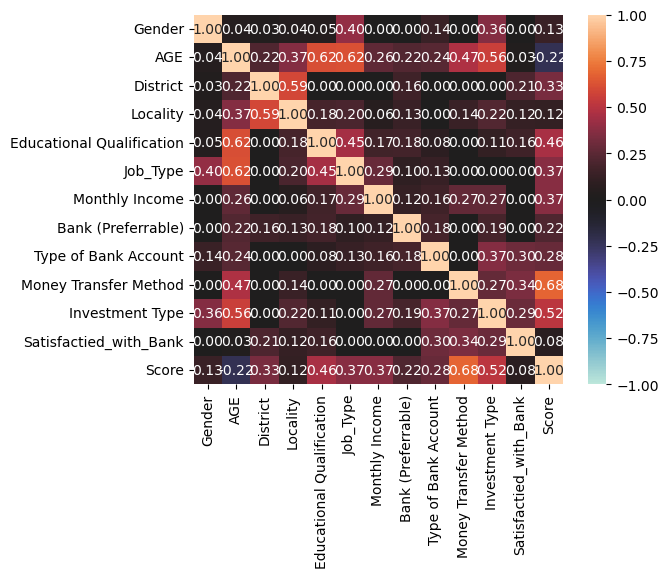

{'corr':                              Gender       AGE  District  Locality  \
 Gender                     1.000000  0.043679  0.026114  0.041606   
 AGE                        0.043679  1.000000  0.215358  0.366793   
 District                   0.026114  0.215358  1.000000  0.589529   
 Locality                   0.041606  0.366793  0.589529  1.000000   
 Educational Qualification  0.045331  0.615385  0.000000  0.183477   
 Job_Type                   0.400688  0.622345  0.000000  0.195429   
 Monthly Income             0.000000  0.261214  0.000000  0.061906   
 Bank (Preferrable)         0.000000  0.218803  0.163923  0.133914   
 Type of Bank Account       0.139726  0.240586  0.000000  0.000000   
 Money Transfer Method      0.000000  0.469901  0.000000  0.140438   
 Investment Type            0.362696  0.561259  0.000000  0.223144   
 Satisfactied_with_Bank     0.000000  0.030935  0.209770  0.123976   
 Score                      0.133234 -0.222929  0.333617  0.117139   
 
          

In [80]:
associations(df6)

In [81]:
df6['Education_level']=df6['Educational Qualification'].map({'Post Graduation':'Above_Graduation','Diploma':'Graduation','Higher Secondary':'Below_Graduation','Graduation':'Graduation','Primary education':'Below_Graduation','PhD':'Above_Graduation','Secondary':'Below_Graduation','Eigth grade':'Below_Graduation','No':'none'})

In [82]:
df6['Educational Qualification'].value_counts()

Educational Qualification
Graduation           58
Post Graduation      26
Higher Secondary     25
Secondary            16
Primary education    11
Eighth grade          8
Diploma               5
No                    4
No                    3
Diploma               1
Primary Education     1
PhD                   1
Name: count, dtype: int64

In [83]:
df6['Monthly Income'] = df6['Monthly Income'].map({'above Rs 50000': 10,'Rs 40000 to Rs 50000':9, 'Rs 30000 to Rs 40000':8, 'Rs 20000 to Rs 30000':7, 'Rs 10000 to Rs 20000':6, 'Rs5000 to Rs10000':5, 'below Rs. 5000':4}).astype(float)
df6['Educational Qualification'] = df6['Educational Qualification'].map({'PhD': 10, 'Post Graduation':9, 'Graduation':8, 'Higher Secondary':7, 'Diploma':6, 'Secondary':5, 'Eighth grade':4, 'Primary education':3, 'No':0}).astype(float)
df6['Job_Type'] = df6['Job_Type'].map({'Business': 10, 'Private job':9, 'Government service':8, 'Self -reliant':7, 'Worker':6, 'Housewife':5, 'Student':4.5, 'Maid':4, 'Other':3}).astype(float)

In [84]:
categorical_col=df6.select_dtypes(exclude=np.number).columns.to_list()

In [85]:
categorical_col

['Gender',
 'District',
 'Locality',
 'Bank (Preferrable)',
 'Type of Bank Account',
 'Money Transfer Method',
 'Investment Type',
 'Satisfactied_with_Bank',
 'Education_level']

In [86]:
df8=df6.drop(['District','Bank (Preferrable)','Type of Bank Account','Money Transfer Method','Investment Type','Satisfactied_with_Bank','Education_level'],axis=1)

In [147]:
df9=pd.read_csv('df9.csv')

In [124]:
df9.head()

,Gender,AGE,Locality,Educational Qualification,Job_Type,Monthly Income,Score
0,Woman,52,Village,9,8.0,10,1.125000
1,Man,63,Village,6,10.0,7,1.265625
2,Woman,51,Suburbs,7,5.0,5,0.188802
3,Woman,27,Village,8,9.0,8,21.188802
4,Man,28,Village,7,8.0,5,3.773600


In [119]:
cat_col = df9.select_dtypes(exclude = np.number).columns.to_list()
cat_col

['Gender', 'Locality']

In [127]:
df10=pd.get_dummies(df9,columns = cat_col,drop_first=True,dtype = int)

In [128]:
df10.head()

,AGE,Educational Qualification,Job_Type,Monthly Income,Score,Gender_Woman,Locality_Suburbs,Locality_Village
0,52,9,8.0,10,1.125000,1,0,1
1,63,6,10.0,7,1.265625,0,0,1
2,51,7,5.0,5,0.188802,1,1,0
3,27,8,9.0,8,21.188802,1,0,1
4,28,7,8.0,5,3.773600,0,0,1


In [129]:
df10.isnull().sum()

AGE                          0
Educational Qualification    0
Job_Type                     0
Monthly Income               0
Score                        0
Gender_Woman                 0
Locality_Suburbs             0
Locality_Village             0
dtype: int64

In [130]:
X=df10.drop('Score',axis=1)
Y=df10['Score']

In [131]:
df10.isnull().sum()

AGE                          0
Educational Qualification    0
Job_Type                     0
Monthly Income               0
Score                        0
Gender_Woman                 0
Locality_Suburbs             0
Locality_Village             0
dtype: int64

In [132]:
X.head()

,AGE,Educational Qualification,Job_Type,Monthly Income,Gender_Woman,Locality_Suburbs,Locality_Village
0,52,9,8.0,10,1,0,1
1,63,6,10.0,7,0,0,1
2,51,7,5.0,5,1,1,0
3,27,8,9.0,8,1,0,1
4,28,7,8.0,5,0,0,1


In [133]:
import statsmodels.api as sm
OLS=sm.OLS(Y,X).fit()

In [134]:
print(OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Score   R-squared (uncentered):                   0.555
Model:                            OLS   Adj. R-squared (uncentered):              0.535
Method:                 Least Squares   F-statistic:                              27.11
Date:                Tue, 04 Jul 2023   Prob (F-statistic):                    6.84e-24
Time:                        00:27:31   Log-Likelihood:                         -589.99
No. Observations:                 159   AIC:                                      1194.
Df Residuals:                     152   BIC:                                      1215.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

### Job Type and Locality is coming out to be insignificant input features.So drop it

In [163]:
df11=df9.drop(['Locality','Job_Type'],axis=1)

In [164]:
df11.isnull().sum()

Gender                       0
AGE                          0
Educational Qualification    0
Monthly Income               0
Score                        0
dtype: int64

In [165]:
cat_col2=df11.select_dtypes(exclude=np.number).columns.to_list()
cat_col2

['Gender']

In [166]:
df11=pd.get_dummies(df11, columns=cat_col2 ,drop_first=True, dtype = int)

In [167]:
df11.head()

,AGE,Educational Qualification,Monthly Income,Score,Gender_Woman
0,52,9,10,1.125000,1
1,63,6,7,1.265625,0
2,51,7,5,0.188802,1
3,27,8,8,21.188802,1
4,28,7,5,3.773600,0


In [168]:
X2=df11.drop('Score',axis=1)
Y2=df11['Score']

In [169]:
OLS2=sm.OLS(Y2,X2).fit()

In [170]:
print(OLS2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Score   R-squared (uncentered):                   0.550
Model:                            OLS   Adj. R-squared (uncentered):              0.539
Method:                 Least Squares   F-statistic:                              47.45
Date:                Tue, 04 Jul 2023   Prob (F-statistic):                    5.38e-26
Time:                        00:35:07   Log-Likelihood:                         -590.84
No. Observations:                 159   AIC:                                      1190.
Df Residuals:                     155   BIC:                                      1202.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

# OLS Outcome 

OLS outcomes:
(1)	After eliminating all insignificant co-efficient associated variables we reached to the final four i.e. Age, Educational Qualification, Gender and Monthly Income.

(2)	Age has negative coefficient, that indicates Financial Literacy score is better among the younger than older person. So younger persons are more prone to use modern banking technologies.

(3)	Educational Qualification and Monthly Income has positive coefficient, so person with higher education and higher monthly income are more used to modern banking.

(4)	Gender woman has negative coefficient, which gives some idea about lack of knowledge regarding modern banking system around women.

# Conclusion

(1)	Our project can help Government to get a meaningful insight and simultaneously in policy making about financial literacy in suburbs and villages.

(2)	Banking sector is more into financial literacy of a certain area, so that they can able to plan their scheme accordingly.

(3)	This type of study is very helpful for NGO ‘s to operate regarding various financial aspects to overcome poverty.